Jhon Alexander Segura Dorado

### Date:
2025-03-24

### Descripción:

**Aspectos a Considerar:**

1. Descripción y Estructura del Dataset:

* Familiarse con los atributos del dataset.
*  la relevancia de cada atributo en la detección de falsificaciones.

2. Distribución y Patrones:

* Identifica tendencias generales en los datos.
* Detecta anomalías o concentraciones inusuales que puedan indicar falsificaciones.

3. Relaciones y Correlaciones:

* Explora las conexiones entre diferentes factores.
* Determina qué características podrían ser indicativas de productos falsificados.

4. Análisis Adicional:

* Piensa fuera de la caja: el dataset puede ofrecer oportunidades para proponer estrategias innovadoras.
* Busca hallazgos inesperados que puedan surgir del análisis.
* Propón estrategias adicionales que podrían mejorar la detección de falsificaciones.

5. Presentación de Resultados:

* Presenta tus resultados de forma clara y concisa.
* Resalta tendencias clave y oportunidades de mejora.
* Identifica áreas que merecen mayor investigación.

**Preguntas Clave:**

Impacto en el Marketplace:

* ¿Por qué es esencial identificar y eliminar productos falsificados?
* ¿Cómo afecta esto a los compradores, vendedores y a la plataforma en general?

Estrategias de Detección:

* Si pudieras diseñar nuevas formas de identificar productos falsificados
* ¿qué tácticas o fuentes de información considerarías?

Evasión de Reglas por Parte de Vendedores:

* ¿Cómo crees que algunos vendedores podrían intentar evadir las reglas para seguir operando?
* ¿Qué soluciones propondrías para adelantarnos a esas tácticas?

## 📚 Importar Lirerias

In [3]:
import pandas as pd
import numpy as np
import os as os
import sys
import matplotlib.pyplot as plt

## 💾 Cargar Datos

In [4]:
# Definir la ruta de la carpeta base
carpeta_base = r"C:\Users\jsegura\2024Información\PROYECTOS_MACHINE\Mercado_Libre\Data"

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_base)

# Imprimir el total de archivos
print(f'Total de archivos en la carpeta {carpeta_base}: {len(archivos_en_carpeta)}')

# Imprimir la lista de nombres de archivos
print('Archivos en la carpeta:')
for nombre_archivo in archivos_en_carpeta:
    print(nombre_archivo)

Total de archivos en la carpeta C:\Users\2024Información\PROYECTOS_MACHINE\Mercado_Libre\Data: 1
Archivos en la carpeta:
DataBase.xlsx


## 👷 Ingeniería de características

### Estructura de los datos

Se identifican las columnas y fuentes de datos de cada archivo para obtener un primer acercamiento a las variables.

In [5]:
# Imprimir la lista de nombres de archivos y sus columnas
print('Archivos en la carpeta y sus columnas:')
for nombre_archivo in archivos_en_carpeta:
    # Construir la ruta completa del archivo
    ruta_archivo = os.path.join(carpeta_base, nombre_archivo)
    
    # Leer el archivo y obtener las columnas
    try:
        df = pd.read_excel(ruta_archivo)
        columnas = df.columns.tolist()
        print(f'Archivo: {nombre_archivo}')
        print(f'Columnas: {columnas}')
    except Exception as e:
        print(f'No se pudo leer el archivo {nombre_archivo}. Error: {e}')

Archivos en la carpeta y sus columnas:
Archivo: DataBase.xlsx
Columnas: ['element_id', 'site_id', 'seller_id', 'Dominio_normalizado', 'Titulo', 'Marca', 'Precio', 'Rule', 'Score', 'Total', 'Moderado', 'Fake', 'Rollback', 'FK_TEST1', 'FK_TEST2']


| Campo                | Descripción                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| 1. element_id        | Id de producto                                                              |
| 2. site_id           | País                                                                        |
| 3. seller_id         | Id del vendedor                                                             |
| 4. Dominio_normalizado | Categoría del producto                                                     |
| 5. Titulo            | Título del producto                                                         |
| 6. Marca             | Marca publicada del producto                                                |
| 7. Precio            | Precio del producto                                                         |
| 8. Rule              | Regla con la que se moderó la publicación                                    |
| 9. Score             | Score del modelo de Machine Learning. Utilizado por la regla "FK_MODELO"    |
| 10. Moderado         | Flag que indica que el producto fue moderado por alguna regla               |
| 11. Fake             | Flag que indica que el producto es un producto falsificado. Taggeado de forma manual |
| 12. Rollback         | Flag que indica que luego de la moderación, la misma fue revertida por un operador de Atención al Cliente ante reclamo de usuario |
| 13. FK_TEST1         | Regla de test. Actualmente apagada. Si detecta que es Fake, FK_TEST1 = 1    |
| 14. FK_TEST2         | Regla de test. Actualmente apagada. Si detecta que es Fake, FK_TEST2 = 1    |


### Perfilamiento de los datos

En este paso se seleccionan aleatoriamente dos filas del DataFrame **Data** para obtener una primera aproximación a los datos. Esto permite identificar si alguna columna del DataFrame contiene un diccionario, facilitando así la revisión y análisis inicial de la estructura de los datos.

In [6]:
# Función para mostrar una muestra aleatoria de 2 filas y transponer el DataFrame
def mostrar_muestra_transpuesta(datos, nombre):
    """
    Muestra una muestra aleatoria de 2 filas del DataFrame y la transpone.
    
    Parameters:
    datos (DataFrame): El DataFrame del cual se tomará la muestra.
    nombre (str): El nombre del DataFrame para imprimir en los resultados.
    """
    muestra = datos.sample(n=2, random_state=1)
    muestra_transpuesta = muestra.T
    print(f"DataFrame transpuesto de {nombre}:\n", muestra_transpuesta)

# Leer y mostrar muestras transpuestas de los archivos Excel en la carpeta
for nombre_archivo in archivos_en_carpeta:
    if nombre_archivo.endswith('.xlsx'):
        ruta_archivo = os.path.join(carpeta_base, nombre_archivo)
        datos = pd.read_excel(ruta_archivo)
        mostrar_muestra_transpuesta(datos, nombre_archivo)

DataFrame transpuesto de DataBase.xlsx:
                                                                  28229  \
element_id                                               COL1152976735   
site_id                                                       COLOMBIA   
seller_id                                                   2305132768   
Dominio_normalizado                          FACIAL_SKIN_CARE_PRODUCTS   
Titulo               La Roche Posay Effaclar Bb Blur Unificador Ant...   
Marca                                                   La Roche-Posay   
Precio                                                        188000.0   
Rule                                                               NaN   
Score                                                             0.16   
Total                                                                1   
Moderado                                                             0   
Fake                                                                 0 

### Tipo de datos

### Identificación de datos nulos

Se procede a identificar los datos nulos en el DataFrame, lo cual es un paso crucial en el preprocesamiento de datos. Este proceso nos permite determinar si alguna columna requiere un tratamiento adicional, como la imputación de valores faltantes mediante la media u otros métodos.

In [7]:
# Función para obtener información de la estructura de datos y calcular el porcentaje de datos no nulos
def analizar_datos(df, nombre_df):
    """
    Imprime la información de la estructura de datos y calcula el porcentaje de datos no nulos.
    
    Parameters:
    df (DataFrame): El DataFrame a analizar.
    nombre_df (str): El nombre del DataFrame para imprimir en los resultados.
    """
    print(f"Información del DataFrame {nombre_df}:")
    df.info()
    porcentaje_no_nulos = df.notnull().mean() * 100
    print(f"\nPorcentaje de datos no nulos en {nombre_df}:\n{porcentaje_no_nulos}\n")

# Leer y mostrar tipos de datos y análisis de los archivos Excel en la carpeta
for nombre_archivo in archivos_en_carpeta:
    if nombre_archivo.endswith('.xlsx'):
        ruta_archivo = os.path.join(carpeta_base, nombre_archivo)
        datos = pd.read_excel(ruta_archivo)
        analizar_datos(datos, nombre_archivo)

Información del DataFrame DataBase.xlsx:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40372 entries, 0 to 40371
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   element_id           40372 non-null  object 
 1   site_id              40372 non-null  object 
 2   seller_id            40372 non-null  int64  
 3   Dominio_normalizado  40372 non-null  object 
 4   Titulo               40372 non-null  object 
 5   Marca                40372 non-null  object 
 6   Precio               40372 non-null  float64
 7   Rule                 4278 non-null   object 
 8   Score                40372 non-null  float64
 9   Total                40372 non-null  int64  
 10  Moderado             40372 non-null  int64  
 11  Fake                 40372 non-null  int64  
 12  Rollback             40372 non-null  int64  
 13  FK_TEST1             40372 non-null  int64  
 14  FK_TEST2             40372 non-null  int64  


Los datos no contienen filas duplicadas y la única columna con valores faltantes es "Regla". Esta variable no se puede eliminar debido a su importancia, ya que representa la regla con la que se moderó la publicación. Por lo tanto, se propone reemplazar los datos en blanco con una etiqueta que diga "No Fue Aplicada la Regla".

### Visualización de las variables Categoricas

In [8]:
# Explorar las columnas categóricas
for column in df.select_dtypes(include=['object']):
  print(f"Column: {column}")
  print(datos[column].unique())
  print("-" * 20)

Column: element_id
['ARG1000130348' 'ARG1002056504' 'ARG1002630435' ... 'PER9980515950'
 'PER999421010' 'PER9998709046']
--------------------
Column: site_id
['ARGENTINA' 'BRASIL' 'CHILE' 'COLOMBIA' 'MEXICO' 'PERU']
--------------------
Column: Dominio_normalizado
['COMPUTER_PROCESSORS' 'COMPUTER_MONITORS' 'SUNGLASSES'
 'HARD_DRIVES_AND_SSDS' 'RAM_MEMORY_MODULES' 'SPEAKERS' 'TONERS'
 'NOTEBOOKS' 'CELLPHONES' 'WRISTWATCHES' 'SMARTWATCHES' 'HEADPHONES'
 'PERFUMES' 'FACIAL_SKIN_CARE_PRODUCTS' 'MEMORY_CARDS' 'INK_CARTRIDGES'
 'MOBILE_DEVICE_CHARGERS' 'COMPUTER_MICE' 'MICROPHONES'
 'DATA_CABLES_AND_ADAPTERS' 'SUNSCREENS' 'BODY_SKIN_CARE_PRODUCTS'
 'GAMEPADS_AND_JOYSTICKS' 'PRINTER_INKS' 'LAPTOP_CHARGERS'
 'TV_REMOTE_CONTROLS' 'AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS']
--------------------
Column: Titulo
['Microprocesador Intel Core I3 12100 12mb Bx8071512100 3.3ghz Socket 1700 4 Núcleos 8 Hilos 12va Generación Socket Fclga1700 Intel Hd Graphics X86-64 Ddr4'
 'Monitor Gamer Samsung Con Pantalla 

### Remplazo de la varible Rule

In [9]:
datos['Rule'].fillna("No Fue Aplicada la Regla", inplace=True)

### Exploración de la Data

En esta sección, se realiza un análisis exploratorio de las variables numéricas clave: 'Moderado', 'Fake', 'Rollback' , 'Precio' y 'Score'. El objetivo es comprender la distribución de estas variables y detectar posibles patrones o anomalías que puedan aportar información relevante para la detección de productos falsificados. Para ello, se utilizarán histogramas y diagramas de caja. A través de la combinación de estas técnicas de visualización, se espera obtener una visión clara de la distribución de las variables numéricas y extraer insights preliminares que guíen el análisis posterior.

Column: Moderado
count    40372.000000
mean         0.105965
std          0.307796
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Moderado, dtype: float64


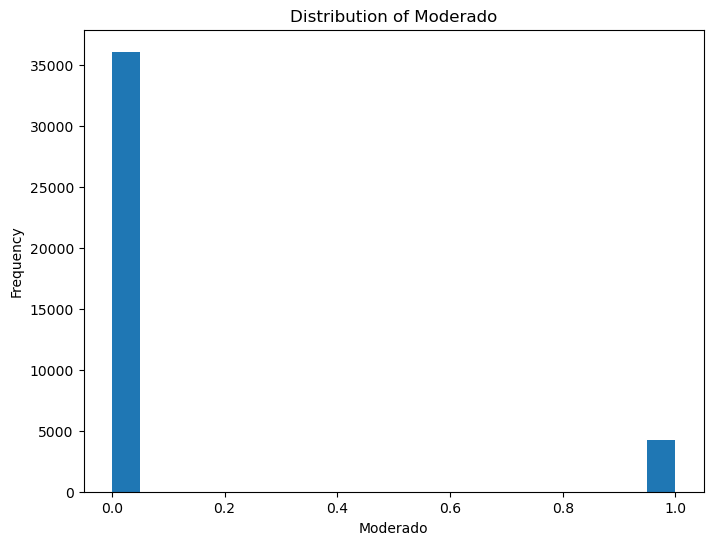

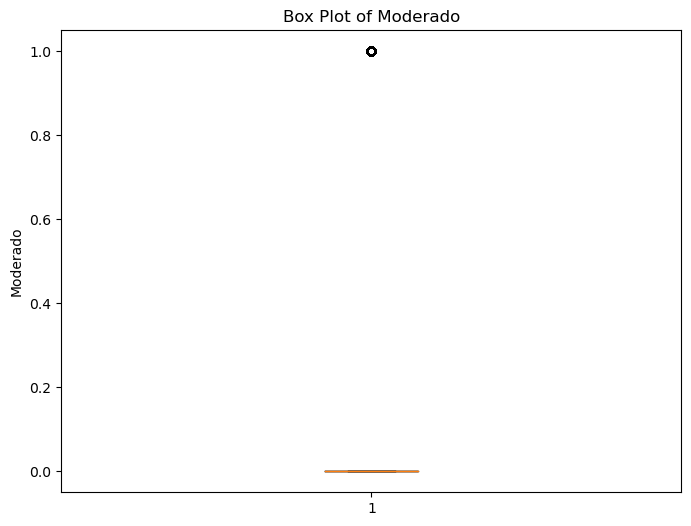

--------------------
Column: Fake
count    40372.000000
mean         0.111191
std          0.314372
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Fake, dtype: float64


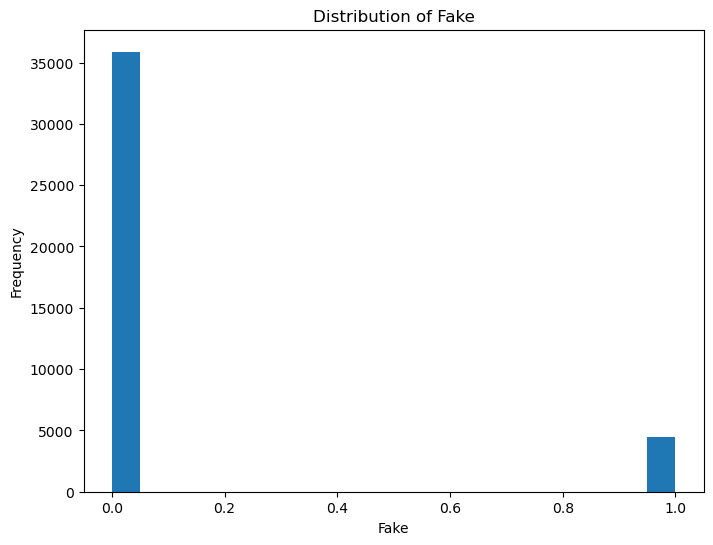

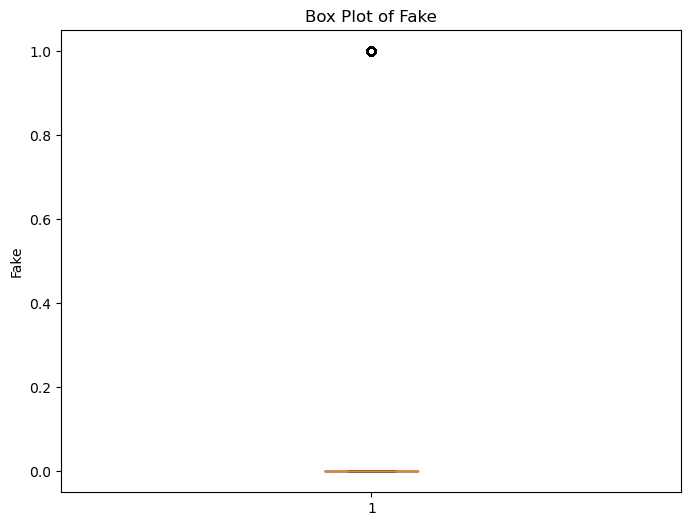

--------------------
Column: Rollback
count    40372.000000
mean         0.007580
std          0.086731
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Rollback, dtype: float64


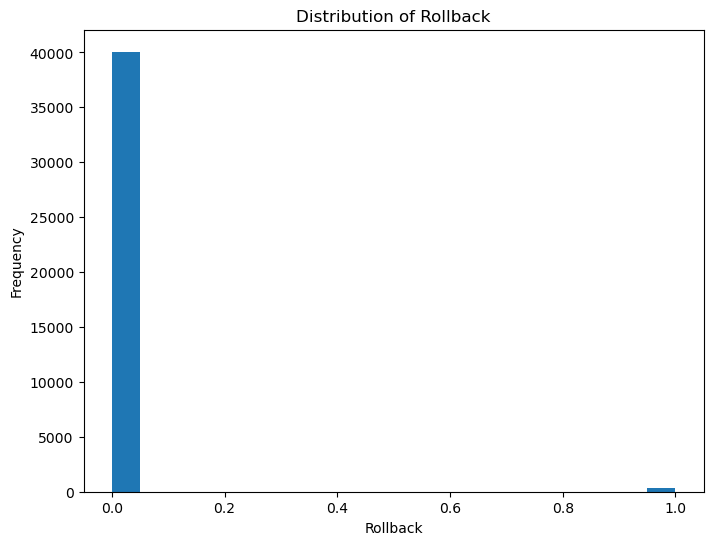

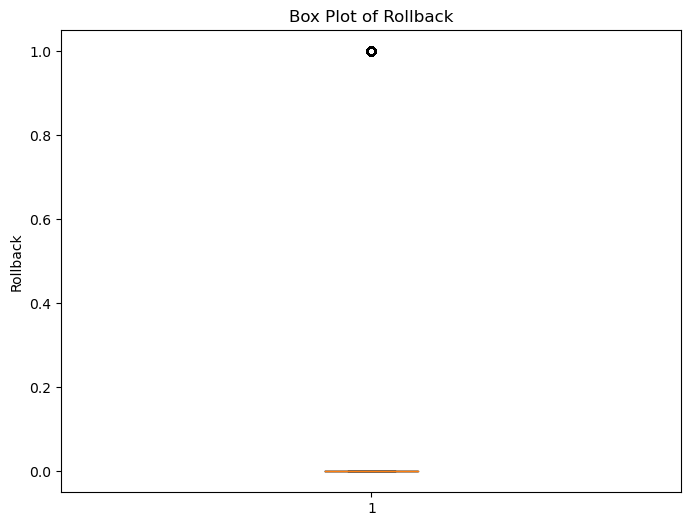

--------------------
Column: Precio
count    4.037200e+04
mean     2.455866e+05
std      6.435465e+05
min      1.117000e+01
25%      6.767050e+02
50%      4.299000e+03
75%      1.549900e+05
max      1.289990e+07
Name: Precio, dtype: float64


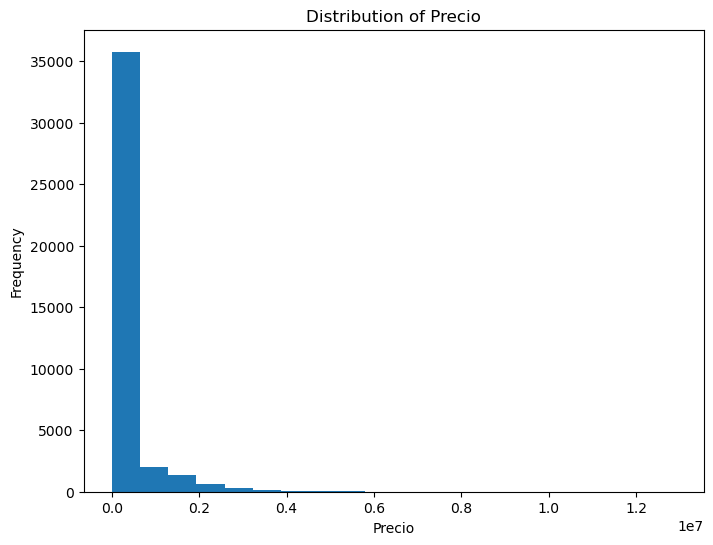

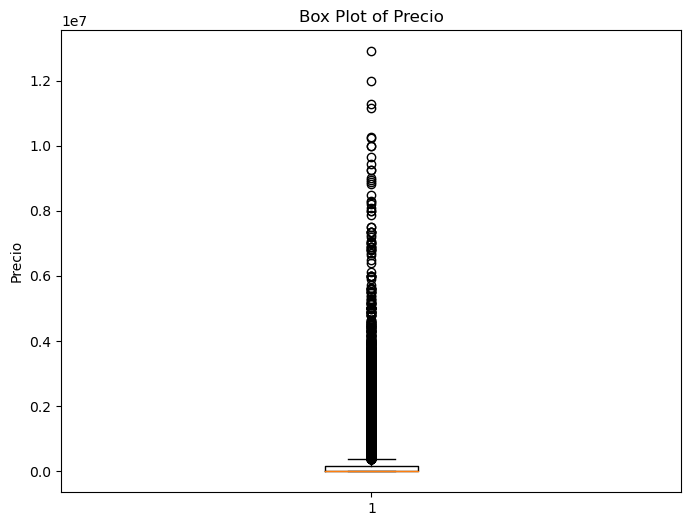

--------------------


In [10]:
columns_to_analyze = ['Moderado', 'Fake', 'Rollback', 'Precio']

for column in columns_to_analyze:
  print(f"Column: {column}")
  print(datos[column].describe())

  plt.figure(figsize=(8, 6))
  plt.hist(datos[column], bins=20)
  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

  plt.figure(figsize=(8, 6))
  plt.boxplot(datos[column])
  plt.title(f"Box Plot of {column}")
  plt.ylabel(column)
  plt.show()

  print("-" * 20)

**Moderado**

- Histograma: El histograma muestra una gran concentración de valores en 0 y una barra mucho más pequeña en 1, indica que la mayoría de los productos no han sido moderados y solo una pequeña proporción ha pasado por un proceso de moderación. Esto podría sugerir que el sistema de moderación actual es selectivo o que la prevalencia de productos problemáticos es baja.

- Diagrama de caja: En el diagrama de caja con la mediana cerca de 0 y pocos o ningún valor atípico refuerza la idea de que la moderación es poco frecuente. Si hubiera valores atípicos (outliers) en 1, estos podrían representar productos que han sido moderados repetidamente, lo que podría ser un indicio de comportamiento sospechoso o de productos problemáticos.

**Fake**

- Histograma: El histograma muestra una mayor concentración en 0 que en 1, indica que hay más productos genuinos que falsos en el conjunto de datos. La proporción entre las barras de 0 y 1 da una idea de la prevalencia de productos falsificados.

- Diagrama de caja: Dado que 'Fake' es una variable binaria, el diagrama de caja mostrará principalmente la mediana en 0 o 1, indicando si la mayoría de los productos son genuinos o falsos. No se esperan valores atípicos en este caso, ya que solo hay dos valores posibles.

**Rollback**

- Histograma: En el histograma se mira una concentración en 0 y una barra mucho más pequeña en 1 sugiere que la mayoría de las moderaciones no son revertidas (rollback). Esto indicaría que el sistema de moderación es generalmente preciso en sus decisiones.

- Diagrama de caja: Para el diagrama de caja como la mediana esta cerca de 0 y pocos o ningún valor atípico refuerza la idea de que las reversiones de moderación son poco frecuentes. Si hubiera valores atípicos (outliers) en 1, estos podrían representar productos con un número inusualmente alto de reversiones, lo que podría indicar problemas con la aplicación de las reglas de moderación.


**Precio**

- Histograma: El histograma muestra una distribución asimétrica positiva o sesgada a la derecha. Esto significa que la mayoría de los precios se concentran en valores bajos, con una "cola" larga que se extiende hacia la derecha, representando los precios más altos.

- Diagrama de caja: El box plot confirma la asimetría a la derecha de la distribución, ya que la mediana se encuentra más cerca del extremo inferior de la caja y hay una mayor cantidad de valores atípicos en el extremo superior.

### Calcula el porcentaje de productos moderados y no moderados y analiza la distribución y relación entre las columnas 'Moderado' y 'Falso'.

In [11]:
moderated_percentage = (datos['Moderado'].sum() / len(datos)) * 100
non_moderated_percentage = 100 - moderated_percentage

print(f"Porcentaje de productos moderados: {moderated_percentage:.2f}%")
print(f"Porcentaje de productos no moderados: {non_moderated_percentage:.2f}%")


print("\nDistribution of 'Moderado' and 'Fake' columns:")
print(pd.crosstab(datos['Moderado'], datos['Fake'], normalize='index') * 100)


fake_moderated_percentage = (datos[(datos['Fake'] == 1) & (datos['Moderado'] == 1)].shape[0] / datos[datos['Fake'] == 1].shape[0]) * 100
print(f"\nPorcentaje de productos 'Fake' que fueron moderados: {fake_moderated_percentage:.2f}%")

Porcentaje de productos moderados: 10.60%
Porcentaje de productos no moderados: 89.40%

Distribution of 'Moderado' and 'Fake' columns:
Fake              0          1
Moderado                      
0         98.512218   1.487782
1          7.620383  92.379617

Porcentaje de productos 'Fake' que fueron moderados: 88.04%


**Porcentaje:**

- Porcentaje de productos moderados: Esto indica que solo el 10.60% de los productos en el conjunto de datos fueron moderados.

- Porcentaje de productos no moderados: La gran mayoría de los productos (89.40%) no fueron moderados.

**Distribución**

- La fila Moderado = 0 muestra la distribución de productos que no fueron moderados:
El 98.51% de los productos no moderados no eran falsos (Fake = 0).
Solo el 1.49% de los productos no moderados eran falsos (Fake = 1).

- La fila Moderado = 1 muestra la distribución de los productos que sí fueron moderados:
El 7.62% de los productos moderados no eran falsos (Fake = 0).
El 92.38% de los productos moderados eran falsos (Fake = 1).

Por otro lado, los productos etiquetados como "Fake", el 88.04% fueron moderados.


**Interpretación General:**

La gran mayoría de los productos moderados el  92.37% son productos que también están etiquetados como "Fake". Esto indica que el sistema de moderación está funcionando para identificar y tomar medidas sobre los productos falsos. La moderación podría ser más amplia, dado que el porcentaje total de productos moderados es bajo (10.60%), es posible que se encuentren productos falsos que no estén siendo moderados. Esto permite mejorar la cobertura y moderar más productos potencialmente problemáticos.

### Explorar la relación entre 'Dominio_normalizado' y 'Marca' para encontrar las categorías de productos y marcas más afectadas por las moderaciones y las falsificaciones.

In [12]:

site_moderation_rates = datos.groupby('site_id')['Moderado'].mean() * 100
print("\nTasas de moderación por Site ID:\n", site_moderation_rates)


domain_moderation_rates = datos.groupby('Dominio_normalizado')['Moderado'].mean() * 100
print("\nTasas de moderación por Dominio_normalizado:\n", domain_moderation_rates)


brand_moderation_rates = datos.groupby('Marca')['Moderado'].mean() * 100
print("\nTasas de moderación por Marca:\n", brand_moderation_rates)


Tasas de moderación por Site ID:
 site_id
ARGENTINA    10.571285
BRASIL       10.458210
CHILE        10.444234
COLOMBIA     10.176125
MEXICO       10.384340
PERU         13.568985
Name: Moderado, dtype: float64

Tasas de moderación por Dominio_normalizado:
 Dominio_normalizado
AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS    31.250000
BODY_SKIN_CARE_PRODUCTS                11.956522
CELLPHONES                             10.015320
COMPUTER_MICE                          11.379310
COMPUTER_MONITORS                      10.502693
COMPUTER_PROCESSORS                     9.213251
DATA_CABLES_AND_ADAPTERS               22.957198
FACIAL_SKIN_CARE_PRODUCTS              10.722348
GAMEPADS_AND_JOYSTICKS                 15.686275
HARD_DRIVES_AND_SSDS                   10.175439
HEADPHONES                             10.531915
INK_CARTRIDGES                         10.985353
LAPTOP_CHARGERS                         7.407407
MEMORY_CARDS                           11.211301
MICROPHONES                        

### Parte 1:

La lista anterior muestra los 'seller_id' de los vendedores con una alta tasa de moderación. El valor asociado a cada seller_id representa la proporción de productos de ese vendedor que fueron moderados. Por ejemplo, el vendedor con seller_id 5508796 tuvo todos sus productos (1.000000 o 100%) moderados. Estos vendedores presentan un porcentaje significativamente alto de productos moderados, lo que podría indicar un comportamiento sospechoso o la publicación frecuente de productos que infringen las reglas. Se recomienda investigar más a fondo a estos vendedores para determinar si están involucrados en actividades fraudulentas o si necesitan ser contactados para revisar sus prácticas de publicación.

### Parte 2:

La segunda parte de la lista muestra las combinaciones de categorías de productos (Dominio_normalizado) y países (site_id) con una alta tasa de moderación. El valor asociado a cada combinación representa la proporción de productos de esa categoría y país que fueron moderados. Por ejemplo, todos los productos de la categoría "AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS" publicados en Perú (site_id = PERU) fueron moderados (1.000000 o 100%). Algunas categorías de productos en ciertos países tienen una probabilidad mucho mayor de ser moderadas. Esto podría deberse a varios factores, como una mayor prevalencia de productos falsificados en esas categorías y países, o reglas de moderación más estrictas para ciertos tipos de productos en regiones específicas.

### Tasa de moderación para cada dominio o categoría de producto

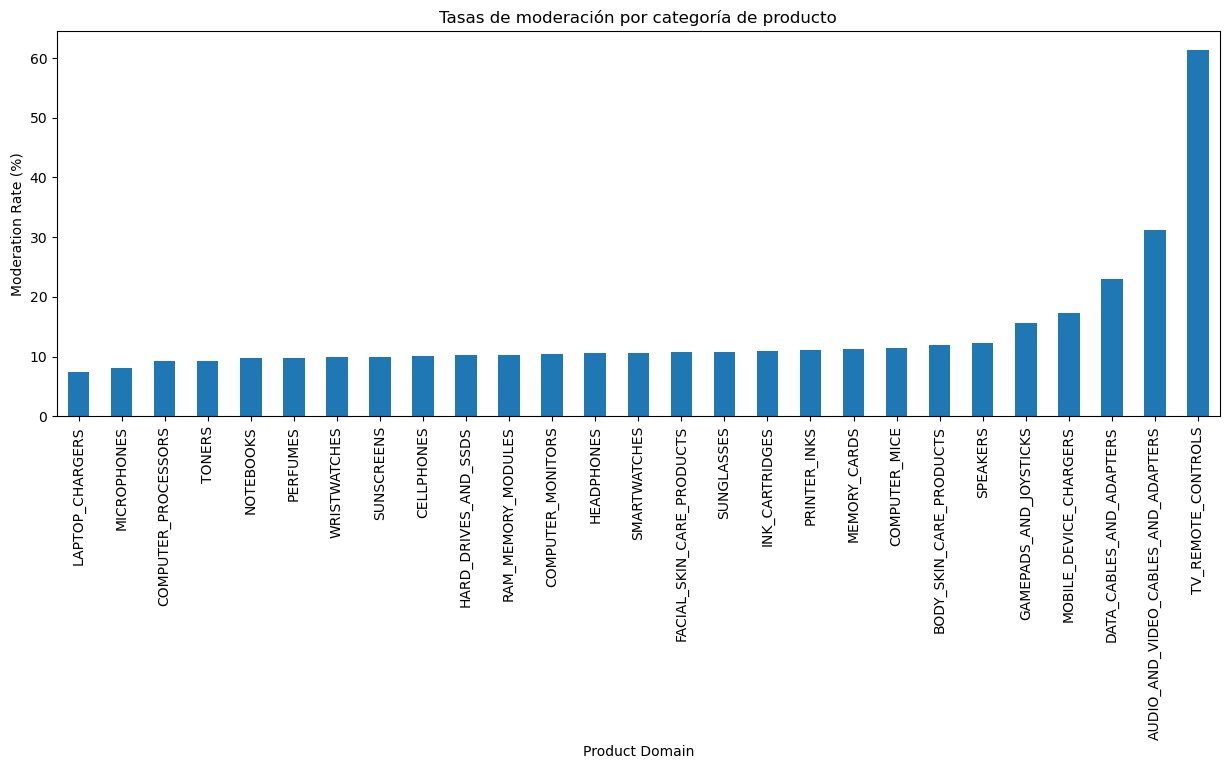

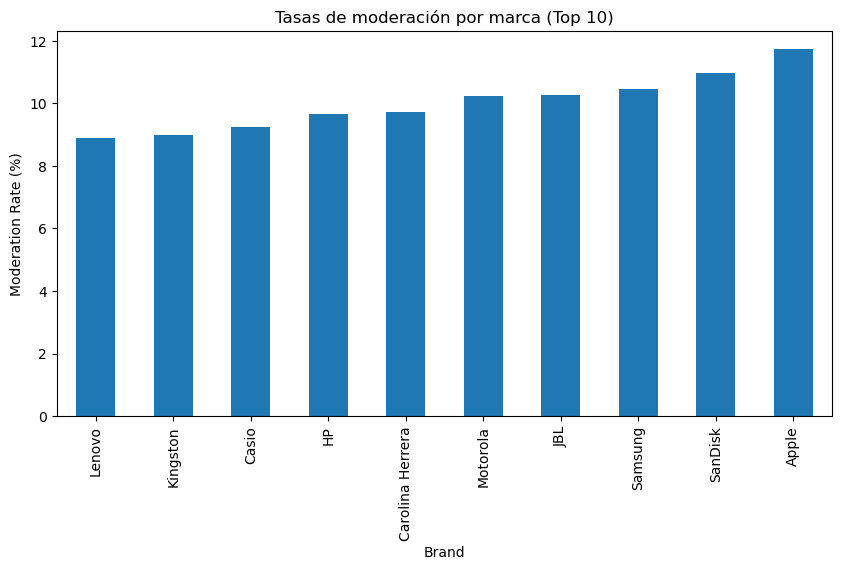

In [13]:

plt.figure(figsize=(15, 5))
domain_moderation_rates.sort_values().plot(kind='bar')
plt.xlabel('Product Domain')
plt.ylabel('Moderation Rate (%)')
plt.title('Tasas de moderación por categoría de producto')
plt.xticks(rotation=90)
plt.show()


top_brands = datos['Marca'].value_counts().head(10).index
brand_moderation_rates_top = brand_moderation_rates[brand_moderation_rates.index.isin(top_brands)]
plt.figure(figsize=(10, 5))
brand_moderation_rates_top.sort_values().plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Moderation Rate (%)')
plt.title('Tasas de moderación por marca (Top 10)')
plt.show()

La gráfica muestra una variación significativa en las tasas de moderación entre las diferentes categorías de productos. Algunas categorías tienen tasas de moderación muy bajas (cercanas al 0%), mientras que otras tienen tasas mucho más altas (superiores al 20% o incluso al 40%).

Categorías con altas tasas de moderación: Las categorías con las tasas de moderación más altas son:

- TV_REMOTE_CONTROLS
- AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS
- DATA_CABLES_AND_ADAPTERS
- LAPTOP_CHARGERS
- CELL_PHONE_CHARGERS

Esto sugiere que estas categorías podrían ser más propensas a tener productos falsificados o que infringen las reglas de la plataforma, lo que lleva a una mayor necesidad de moderación. Muchas categorías tienen tasas de moderación muy bajas, lo que indica que la mayoría de los productos en esas categorías no requieren moderación.

La gráfica revela que la necesidad de moderación varía significativamente entre las categorías de productos. Las categorías con altas tasas de moderación deben ser objeto de mayor atención y escrutinio, ya que podrían ser más vulnerables a la presencia de productos falsificados o que infringen las reglas.

### Análisis detallado de las principales categorías de productos y marcas con las tasas de moderación más altas

In [14]:

top_domain_moderation = domain_moderation_rates.sort_values(ascending=False).head(5)
print("\nLas 5 categorías de productos con mayor índice de moderación:\n", top_domain_moderation)

top_brand_moderation = brand_moderation_rates.sort_values(ascending=False).head(5)
print("\nLas 5 marcas principales con las tasas de moderación más altas:\n", top_brand_moderation)

for category in top_domain_moderation.index:
    category_df = df[df['Dominio_normalizado'] == category]
    print(f"\nAnálisis por categoría: {category}")
    print("Puntuación promedio:", category_df['Score'].mean())
    print("Porcentaje falso:", (category_df['Fake'].sum() / len(category_df)) * 100)
    print("Precio medio:", category_df['Precio'].mean())

for brand in top_brand_moderation.index:
    brand_df = df[df['Marca'] == brand]
    print(f"\nAnalysis for brand: {brand}")
    print("Puntuación promedio:", brand_df['Score'].mean())
    print("Porcentaje falso:", (brand_df['Fake'].sum() / len(brand_df)) * 100)
    print("Precio medio:", brand_df['Precio'].mean())



Las 5 categorías de productos con mayor índice de moderación:
 Dominio_normalizado
TV_REMOTE_CONTROLS                     61.428571
AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS    31.250000
DATA_CABLES_AND_ADAPTERS               22.957198
MOBILE_DEVICE_CHARGERS                 17.365269
GAMEPADS_AND_JOYSTICKS                 15.686275
Name: Moderado, dtype: float64

Las 5 marcas principales con las tasas de moderación más altas:
 Marca
Segunda marca Ray-Ban    100.0
Simil HP                 100.0
Segunda marca HP         100.0
Segunda marca Intel      100.0
Segunda marca JBL        100.0
Name: Moderado, dtype: float64

Análisis por categoría: TV_REMOTE_CONTROLS
Puntuación promedio: 0.7221428571428572
Porcentaje falso: 10.0
Precio medio: 4000.3051428571416

Análisis por categoría: AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS
Puntuación promedio: 0.555625
Porcentaje falso: 18.75
Precio medio: 10914.738125

Análisis por categoría: DATA_CABLES_AND_ADAPTERS
Puntuación promedio: 0.49112840466926067
Porcentaj

1. Las categorías que presentan los mayores índices de moderación comparten ciertas características que podrían estar relacionadas con la frecuencia de falsificaciones y el comportamiento de los vendedores:

**TV_REMOTE_CONTROLS**

Tasa de moderación: 61.43%

Puntuación promedio: 0.722

Porcentaje de productos falsos: 10.0%

Precio promedio: 4,000.31

Observación: Esta categoría tiene la tasa más alta de moderación, lo que sugiere una mayor incidencia de incumplimientos, aunque el porcentaje de falsificaciones es relativamente bajo. Esto podría estar relacionado con descripciones incorrectas o falta de información en las publicaciones.

**AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS**

Tasa de moderación: 31.25%

Puntuación promedio: 0.556

Porcentaje de productos falsos: 18.75%

Precio promedio: 10,914.74

Observación: La alta tasa de moderación y falsificaciones indica que esta categoría es problemática. Los precios relativamente altos podrían atraer a falsificadores o vendedores con prácticas no conformes.

**DATA_CABLES_AND_ADAPTERS**

Tasa de moderación: 22.96%

Puntuación promedio: 0.491

Porcentaje de productos falsos: 9.34%

Precio promedio: 26,522.07

Observación: Aunque el porcentaje de falsificaciones es más bajo que en la categoría anterior, los precios elevados podrían justificar una supervisión más estricta para evitar fraudes.

**MOBILE_DEVICE_CHARGERS**

Tasa de moderación: 17.37%

Puntuación promedio: 0.478

Porcentaje de productos falsos: 10.78%

Precio promedio: 35,001.75

Observación: Esta categoría presenta un precio promedio notablemente alto, lo que podría estar relacionado con la comercialización de productos premium o réplicas de marcas reconocidas.

**GAMEPADS_AND_JOYSTICKS**

Tasa de moderación: 15.69%

Puntuación promedio: 0.424

Porcentaje de productos falsos: 6.86%

Precio promedio: 56,219.24

Observación: Aunque el porcentaje de productos falsos es el más bajo entre las categorías principales, los precios altos y la tasa de moderación sugieren que esta categoría también necesita monitoreo.


2. Marcas con las tasas de moderación más altas
Todas las marcas con el 100% de moderación comparten la característica de ser "Segunda marca" o "Genérico", lo que indica una alta probabilidad de productos falsificados.

**Segunda marca Ray-Ban**

Puntuación promedio: 0.96

Porcentaje de productos falsos: 100.0%

Precio promedio: 187,945.00

Observación: Los productos bajo esta marca tienen precios elevados, lo que podría estar asociado con intentos de vender imitaciones de una marca premium.

**Simil HP**

Puntuación promedio: 0.939

Porcentaje de productos falsos: 100.0%

Precio promedio: 365,319.31

Observación: Los precios extremadamente altos refuerzan la hipótesis de que estos productos buscan imitar equipos originales de HP, pero no cumplen con los estándares requeridos.

**Segunda marca HP**

Puntuación promedio: 0.936

Porcentaje de productos falsos: 100.0%

Precio promedio: 315,178.84

Observación: Similar al caso anterior, esta marca presenta un comportamiento sospechoso relacionado con productos de alto valor que podrían ser réplicas.

**Segunda marca Intel**

Puntuación promedio: 0.983

Porcentaje de productos falsos: 100.0%

Precio promedio: 219,247.73

Observación: Dado que Intel es una marca reconocida, estos productos probablemente estén relacionados con la venta de procesadores o componentes no originales.

**Segunda marca JBL**

Puntuación promedio: 0.954

Porcentaje de productos falsos: 100.0%

Precio promedio: 12,054.52

Observación: En comparación con las otras marcas, los precios son más bajos, lo que podría estar vinculado a productos más accesibles que intentan imitar dispositivos de audio originales.


3. Categorías: Las categorías con alta moderación tienden a incluir productos con precios variados, pero la incidencia de falsificaciones parece estar influida por factores como la popularidad del producto y su demanda en el mercado. Es crucial reforzar los controles en estas categorías, especialmente en aquellas con mayores tasas de falsificaciones.

4. Marcas: Las marcas con tasas de moderación del 100% son todas no oficiales, lo que evidencia una tendencia clara hacia la comercialización de productos falsificados o de baja calidad bajo nombres genéricos o de imitación.

Con base en el análisis realizado hasta el momento, hemos identificado algunos patrones potenciales y valores atípicos relacionados con las moderaciones. Para explorar estos patrones con más detalle, podemos analizar la distribución de la puntuación para diferentes grupos de productos, como productos moderados frente a productos no moderados, y productos marcados como falsos frente a los que no lo están.

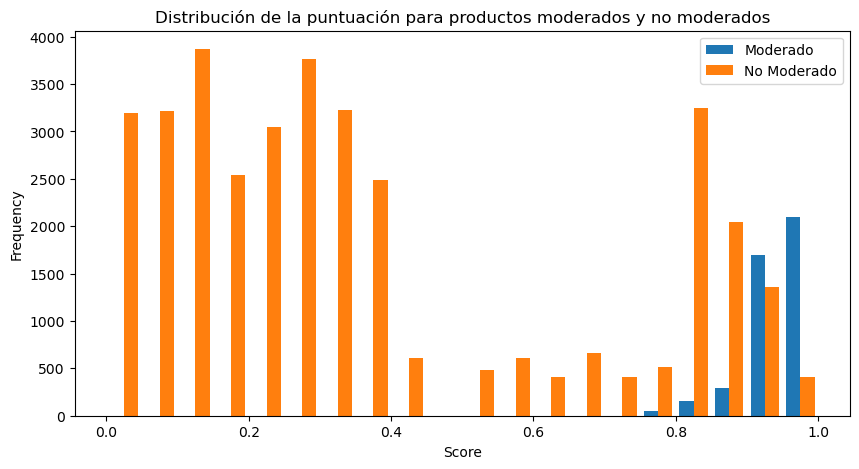

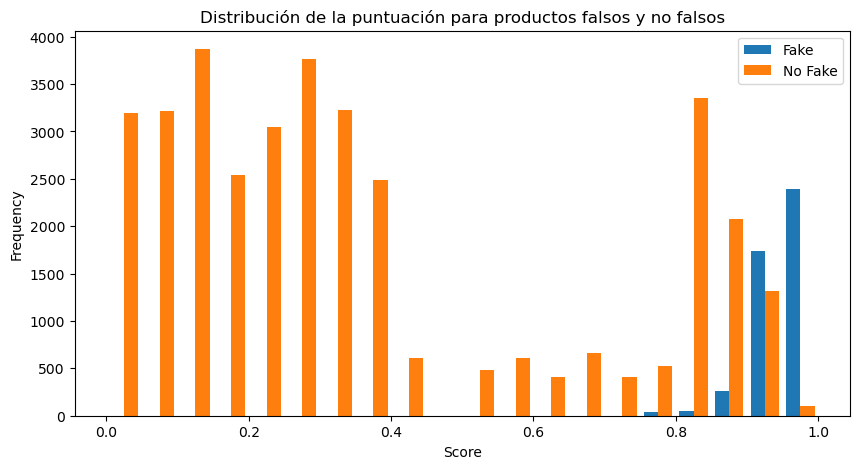

In [15]:
plt.figure(figsize=(10, 5))
plt.hist([df[df['Moderado'] == 1]['Score'], df[df['Moderado'] == 0]['Score']], bins=20, label=['Moderado', 'No Moderado'])
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribución de la puntuación para productos moderados y no moderados')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.hist([df[df['Fake'] == 1]['Score'], df[df['Fake'] == 0]['Score']], bins=20, label=['Fake', 'No Fake'])
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribución de la puntuación para productos falsos y no falsos')
plt.legend()
plt.show()

**Grafica 1**

La distribución de productos no moderados domina en casi todas las puntuaciones bajas, lo que es esperable ya que no todos los productos publicados son moderados. Por el contrario, la proporción de productos moderados se vuelve más significativa a partir de puntuaciones cercanas a 0.8, destacando una correlación positiva entre una puntuación alta y la probabilidad de ser moderado.

**Grafica 2**

La mayoría de los productos en este rango no son falsos, lo que indica que puntuaciones más bajas están correlacionadas con un menor riesgo de falsificación. Aquí se observa una tendencia opuesta, predominan los productos falsos, lo que sugiere que este rango está asociado con atributos que aumentan la probabilidad de que un producto sea una falsificación (por ejemplo, nombres de marca genéricos, precios inusuales o descripciones engañosas).


### Proporción de productos falsos por site_id y Dominio_normalizado

Proporción de productos falsos por site_id y Dominio_normalizado:
 site_id    Dominio_normalizado                
ARGENTINA  AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS     0.000000
           BODY_SKIN_CARE_PRODUCTS                11.111111
           CELLPHONES                             10.291734
           COMPUTER_MICE                           9.890110
           COMPUTER_MONITORS                      11.786372
                                                    ...    
PERU       SPEAKERS                               14.465409
           SUNGLASSES                              0.000000
           SUNSCREENS                              5.882353
           TONERS                                  0.000000
           WRISTWATCHES                           16.438356
Name: Fake, Length: 157, dtype: float64


<Figure size 1500x500 with 0 Axes>

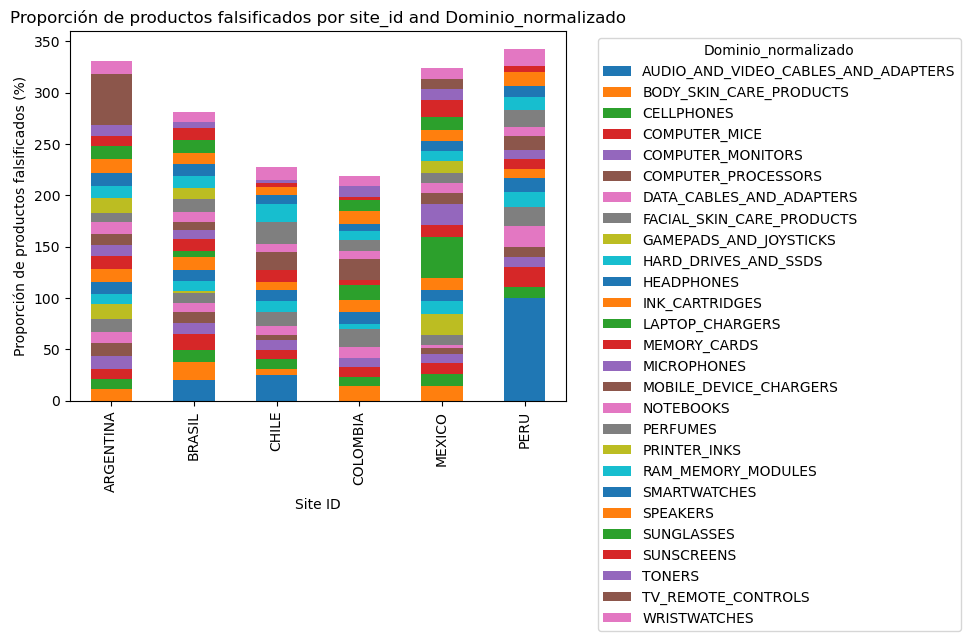

In [16]:

site_domain_fake_proportion = df.groupby(['site_id', 'Dominio_normalizado'])['Fake'].mean() * 100
print("Proporción de productos falsos por site_id y Dominio_normalizado:\n", site_domain_fake_proportion)


plt.figure(figsize=(15, 5))
site_domain_fake_proportion.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Site ID')
plt.ylabel('Proporción de productos falsificados (%)')
plt.title('Proporción de productos falsificados por site_id and Dominio_normalizado')
plt.xticks(rotation=90)
plt.legend(title='Dominio_normalizado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**1. Proporción por país (site_id):**

Los países Argentina, Brasil, México y Perú tienen la mayor proporción de productos falsificados, alcanzando valores similares y relativamente altos en comparación con otros países como Chile y Colombia, que presentan valores más bajos.

Esto sugiere que en estos países hay un mayor nivel de publicaciones de productos potencialmente falsificados.

**2. Dominio de productos falsificados:**

La proporción de productos falsificados está distribuida entre diversas categorías (diferenciadas por colores en la barra apilada). Algunas categorías como:

AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS

DATA_CABLES_AND_ADAPTERS

MOBILE_DEVICE_CHARGERS

SUNGLASSES

SMARTWATCHES

Estas son recurrentes en varios países, lo que podría indicar que estas categorías tienen una mayor probabilidad de ser falsificadas. Sin embargo, el análisis muestra que no hay una sola categoría dominante, lo que indica una diversidad de productos afectados por falsificaciones en cada mercado.


**3. Comparación entre países:**

Argentina y México presentan una proporción más alta en términos absolutos de productos falsificados, lo que podría deberse a factores como:

Mayor volumen de publicaciones.

Mayor demanda en categorías específicas con alta probabilidad de falsificación.

Chile y Colombia tienen menos categorías con una proporción significativa de productos falsificados, lo que sugiere una incidencia menor de este fenómeno.

### Proporción de productos falsificados por Marca ay Dominio_normalizado

Proporción de productos falsificados por Marca ay Dominio_normalizado:
 Marca   Dominio_normalizado                
Apple   AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS     0.000000
        CELLPHONES                             10.911425
        COMPUTER_MICE                          35.714286
        COMPUTER_MONITORS                       0.000000
        DATA_CABLES_AND_ADAPTERS                6.410256
                                                 ...    
Xiaomi  SMARTWATCHES                            9.392265
        SPEAKERS                               15.294118
        SUNGLASSES                              0.000000
        TONERS                                  0.000000
        TV_REMOTE_CONTROLS                      0.000000
Name: Fake, Length: 193, dtype: float64


<Figure size 10000x500 with 0 Axes>

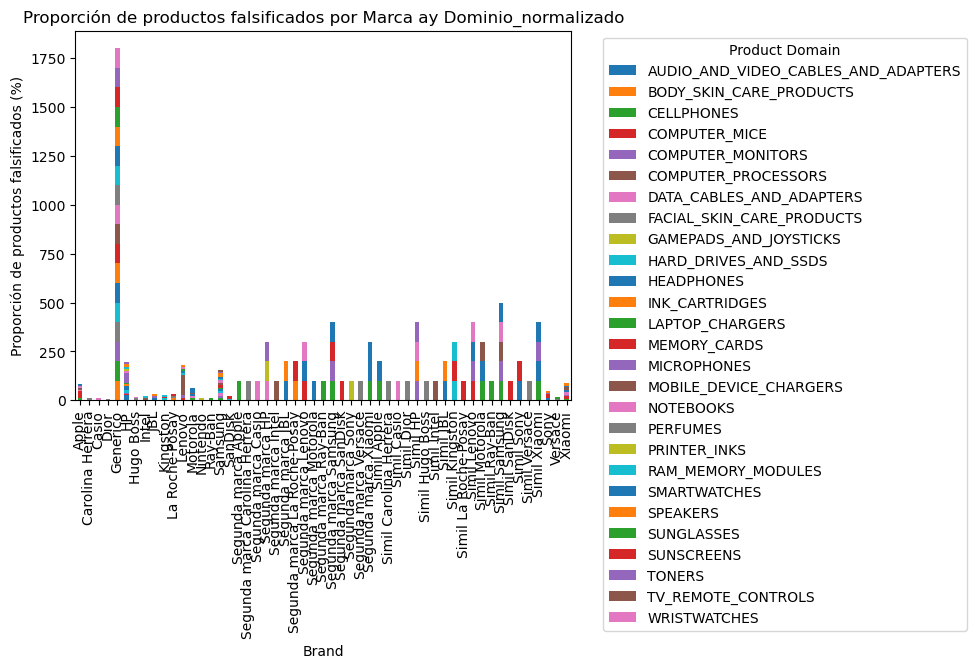

In [17]:

brand_domain_fake_proportion = df.groupby(['Marca', 'Dominio_normalizado'])['Fake'].mean() * 100
print("Proporción de productos falsificados por Marca ay Dominio_normalizado:\n", brand_domain_fake_proportion)


plt.figure(figsize=(100, 5))
brand_domain_fake_proportion.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Brand')
plt.ylabel('Proporción de productos falsificados (%)')
plt.title('Proporción de productos falsificados por Marca ay Dominio_normalizado')
plt.xticks(rotation=90)
plt.legend(title='Product Domain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Marcas con mayor proporción de falsificaciones:**

- "Genérico" destaca significativamente con una proporción extremadamente alta de productos falsificados, mucho mayor que cualquier otra marca. Esto sugiere que los productos sin una marca específica (o marcados como genéricos) son más propensos a ser clasificados como falsificados.

- Varias marcas etiquetadas como "Simil" (Simil HP, Simil JBL, etc.) y "Segunda Marca" (Segunda Marca Intel, Segunda Marca Ray-Ban, etc.) también tienen altos niveles de falsificación. Esto refuerza la idea de que las marcas que intentan imitar productos originales tienen mayor probabilidad de ser reportadas o clasificadas como falsas.

- Las marcas reconocidas y originales (como Apple, JBL, y Carolina Herrera) tienen proporciones significativamente menores de productos falsificados en comparación con marcas genéricas o imitadoras.

- Productos tecnológicos como cables, cargadores y de moda gafas de sol, perfumes son las categorías más afectadas. Estas categorías podrían ser el enfoque inicial de medidas de control.


### Visualisar la proporción de productos 'Falsos' dentro de diferentes categorías de 'site_id', 'Dominio_normalizado', 'Marca' y 'Regla'

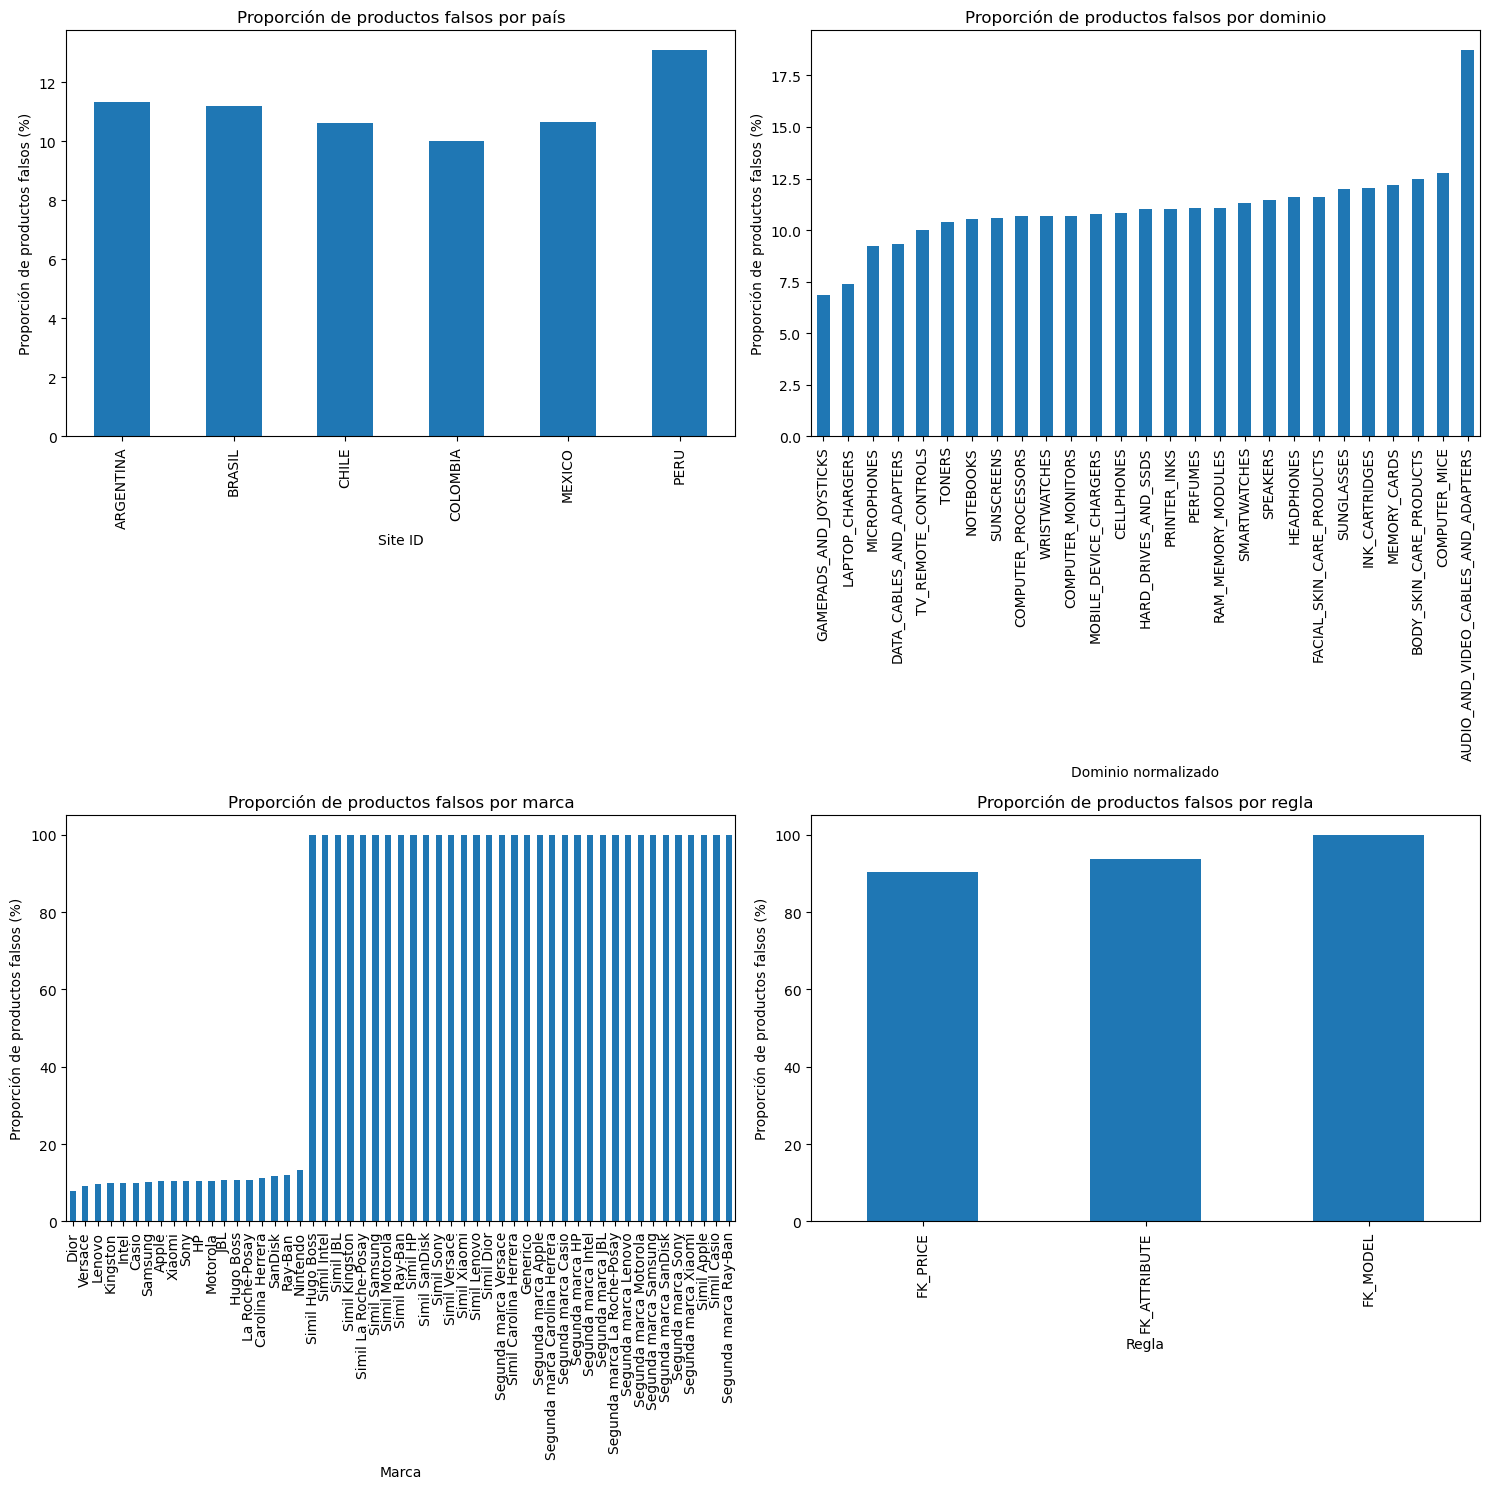

In [18]:

plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
site_fake_proportion = df.groupby('site_id')['Fake'].mean() * 100
site_fake_proportion.plot(kind='bar')
plt.xlabel('Site ID')
plt.ylabel('Proporción de productos falsos (%)')
plt.title('Proporción de productos falsos por país')

plt.subplot(2, 2, 2)
domain_fake_proportion = df.groupby('Dominio_normalizado')['Fake'].mean() * 100
domain_fake_proportion.sort_values().plot(kind='bar')
plt.xlabel('Dominio normalizado')
plt.ylabel('Proporción de productos falsos (%)')
plt.title('Proporción de productos falsos por dominio')
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
brand_fake_proportion = df.groupby('Marca')['Fake'].mean() * 100
brand_fake_proportion.sort_values().plot(kind='bar')
plt.xlabel('Marca')
plt.ylabel('Proporción de productos falsos (%)')
plt.title('Proporción de productos falsos por marca')
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
rule_fake_proportion = df.groupby('Rule')['Fake'].mean() * 100
rule_fake_proportion.sort_values().plot(kind='bar')
plt.xlabel('Regla')
plt.ylabel('Proporción de productos falsos (%)')
plt.title('Proporción de productos falsos por regla')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Explanations (replace with your detailed analysis in Spanish)
# Gráfico 5: Muestra la proporción de productos falsos en cada país.
# Gráfico 6: Muestra la proporción de productos falsos en cada dominio de producto.
# Gráfico 7: Muestra la proporción de productos falsos en cada marca.
# Gráfico 8: Muestra la proporción de productos falsos en cada regla aplicada.

### Distribución de 'Rollback' por 'Regla' para comprender qué reglas de moderación son propensas a ser revocadas.

In [19]:

rollback_by_rule = datos.groupby('Rule')['Rollback'].sum()


rollback_proportion_by_rule = datos.groupby('Rule')['Rollback'].mean()


print("Recuento de reversiones por regla:")
display(rollback_by_rule)

print("Proporción de reversión por regla:")
display(rollback_proportion_by_rule)

Recuento de reversiones por regla:


Rule
FK_ATTRIBUTE                 71
FK_MODEL                      0
FK_PRICE                    235
No Fue Aplicada la Regla      0
Name: Rollback, dtype: int64

Proporción de reversión por regla:


Rule
FK_ATTRIBUTE                0.056038
FK_MODEL                    0.000000
FK_PRICE                    0.091121
No Fue Aplicada la Regla    0.000000
Name: Rollback, dtype: float64

Alta incidencia en FK_PRICE: Los datos sugieren que los precios son una fuente importante de problemas en los productos moderados. Esto puede estar relacionado con errores en la entrada manual de datos, políticas de precios inconsistentes, o intentos deliberados de manipulación.

Atributos como foco secundario: La regla FK_ATTRIBUTE también destaca como un área que requiere atención, posiblemente por discrepancias en los atributos de los productos (como nombres de marcas, especificaciones técnicas, etc.).

Modelo y otras reglas estables: Las reversiones para la regla FK_MODEL y casos donde las reglas no fueron aplicadas son inexistentes, lo cual es positivo, ya que indica estabilidad en estas áreas.

### Calcular la correlación entre 'Precio', 'Score' y 'Moderado' para identificar patrones potenciales en los precios de productos moderados.

In [20]:
# Calculate the correlation matrix for 'Precio', 'Score', and 'Moderado'.
correlation_matrix = datos[['Precio', 'Score', 'Moderado']].corr()

# Display the correlation matrix.
display(correlation_matrix)

,Precio,Score,Moderado
Precio,1.000000,-0.026302,-0.037265
Score,-0.026302,1.000000,0.536921
Moderado,-0.037265,0.536921,1.000000


Relación entre Precio y otras variables: El precio no tiene una correlación fuerte ni con el score ni con la moderación, lo que sugiere que no es un factor relevante en estas áreas.

Importancia del Score en la Moderación: La moderación tiene una correlación significativa con el score, lo que resalta que los productos revisados o validados tienden a ser percibidos como mejores o más confiables.

### Identificamos las reglas que son particularmente efectivas o ineficaces para identificar productos falsificados y resumir posibles palabras clave o patrones de títulos que podrían ser indicadores de productos falsificados.

Palabras más comunes en los títulos de productos falsos (sin palabras irrelevantes):
      Palabra  Frecuencia
0       color        1230
1       negro         780
2         ram         649
3          gb         573
4          hp         527
5       casio         527
6   imitacion         458
7         oem         434
8         jbl         416
9         ssd         409
10      reloj         385
11      preto         385
12    calidad         379
13   premium!         379
14    samsung         376
15         ml         357
16    primera         351
17      línea         351
18        cor         341
19      intel         340


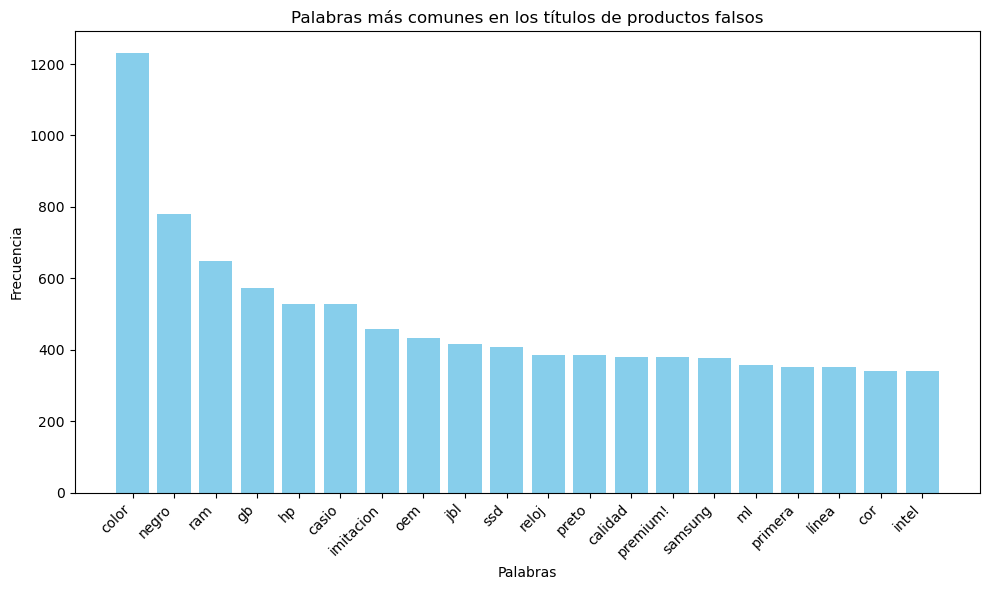

In [21]:
from collections import Counter

# Lista de palabras irrelevantes (stopwords) en español.
stopwords = set([
    "de", "la", "el", "los", "las", "y", "en", "para", "con", "a", "del", 
    "por", "un", "una", "-", "o", "al", "lo", "e"
])

# Filtrar el dataframe para incluir solo productos 'Fake'.
fake_products = datos[datos['Fake'] == 1]

# Extraer los títulos de los productos falsos y tokenizarlos en palabras.
words = ' '.join(fake_products['Titulo']).lower().split()

# Filtrar las palabras eliminando las que están en stopwords.
filtered_words = [word for word in words if word not in stopwords]

# Contar la frecuencia de cada palabra filtrada.
word_counts = Counter(filtered_words)

# Obtener las 20 palabras más comunes.
most_common_words = word_counts.most_common(20)

# Convertir los datos en un DataFrame para mayor claridad.
common_words_df = pd.DataFrame(most_common_words, columns=['Palabra', 'Frecuencia'])

# Mostrar la tabla.
print("Palabras más comunes en los títulos de productos falsos (sin palabras irrelevantes):")
print(common_words_df)

# Crear una gráfica de barras para visualizar los datos.
plt.figure(figsize=(10, 6))
plt.bar(common_words_df['Palabra'], common_words_df['Frecuencia'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Palabras más comunes en los títulos de productos falsos')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


**Reglas que son especialmente eficaces para identificar falsificaciones:**

- FK_MODEL: Esta regla tiene la mayor proporción de productos “falsos”, lo que sugiere que es muy eficaz para detectar falsificaciones.
- FK_ATTRIBUTE: Esta regla tiene una alta proporción de productos “falsos”, lo que sugiere que también es eficaz para identificar falsificaciones.
- FK_PRICE: Esta regla tiene una proporción moderada de productos “falsos”, pero también tiene una alta proporción de reversiones, lo que indica que podría revocarse con frecuencia.


**Posibles palabras clave o patrones de títulos que podrían ser indicadores de productos falsificados:**

- Palabras como 'imitacion', 'oem', 'calidad', 'premium!', podrían indicar productos falsificados.
- Ciertas marcas como 'Casio', 'JBL', and 'Samsung' aparecer con frecuencia en los títulos de productos falsos.
- La presencia de especificaciones del producto como por ejemplo 'RAM', 'GB', 'SSD', 'ML' ambién podría ser un indicio de falsificaciones.

**Conclusiones del Análisis Exploratorio**


**1. Hallazgos Clave**

Alta Moderación de Productos Falsos: El 88.04% de los productos identificados como "Falsos" fueron moderados, reflejando un sistema eficiente en la detección de irregularidades.

Tendencias Regionales: Perú presenta una tasa de moderación superior al promedio, indicando una mayor incidencia de productos falsificados en comparación con otros países.

Categorías Vulnerables: Las categorías con mayor susceptibilidad a falsificaciones incluyen:

Controles Remotos de TV.

Cables y Adaptadores de Audio y Video.

Cables y Adaptadores de Datos.

Marcas Sospechosas: Términos como “Segunda Marca” o “Simil” en los nombres de marca tienen una tasa de moderación del 100%, siendo indicadores clave de falsificaciones.

Vendedores de Alto Riesgo: Algunos vendedores tienen tasas de moderación superiores al 50%, sugiriendo un potencial involucramiento en actividades fraudulentas.

Correlaciones Importantes:

Productos con mayor "Score" tienen mayor probabilidad de ser falsos.

Productos de menor precio están más asociados con falsificaciones.

Combinaciones específicas de país y categoría presentan patrones elevados de falsificaciones.

**2. Distribución y Patrones**

Tendencias:

Alta coincidencia entre productos marcados como "Falsos" y su posterior moderación.

Mayor incidencia de falsificaciones en Perú.

Categorías específicas destacan por su alta vulnerabilidad.

Anomalías:

Marcas con términos genéricos o ambiguos tienen tasas de moderación extremadamente altas.

Algunos vendedores concentran actividades sospechosas.

Concentraciones Inusuales:

Patrones regionales en ciertas categorías y países, como Perú, con mayores tasas de falsificaciones.

**3. Oportunidades y Hallazgos Inesperados**

Patrones Regionales: La concentración de productos falsificados en Perú sugiere la necesidad de estrategias regionalizadas.

Detección por Palabras Clave: Términos específicos en nombres de marca podrían ser un método rápido para identificar falsificaciones.

Auditorías: Los vendedores con altas tasas de moderación justifican revisiones proactivas para mitigar actividades fraudulentas.

Modelos Predictivos: Existe potencial para desarrollar modelos de machine learning con variables como "Score", precio, categoría y región para mejorar la detección de falsificaciones.

**4. Estrategias para Mejorar la Detección**

Personalización Regional:

Implementar medidas específicas para países con alta incidencia, como Perú.

Realizar campañas educativas y reforzar la regulación local.

Procesamiento del Lenguaje Natural (PLN):

Usar técnicas como BERT para identificar patrones en descripciones sospechosas.

Sistema de Alertas:

Priorizar moderación en productos con altos "Scores" o palabras clave sospechosas.

Auditorías de Vendedores:

Revisar frecuentemente a vendedores con altas tasas de moderación.

Visión Computacional:

Detectar diferencias visuales entre productos auténticos y falsificados mediante análisis de imágenes.

**5. Impacto en el Marketplace**

Compradores:

La confianza y experiencia del cliente disminuyen con productos falsificados.

Riesgo de seguridad al adquirir productos no genuinos.

Vendedores Legítimos:

Competencia desleal por precios más bajos de productos falsos.

Impacto negativo en la reputación de sus productos genuinos.

Plataforma:

Pérdida de ingresos por disminución de clientes y vendedores legítimos.

Riesgos legales por facilitar la venta de falsificaciones.

Deterioro de la reputación del marketplace.

**6. Prevención y Soluciones**

- Tácticas de Evasión:

Utilizar descripciones ambiguas o engañosas para evitar la detección por palabras clave.

Publicar productos en categorías incorrectas para evitar reglas específicas de cada categoría.

Crear múltiples cuentas para eludir las restricciones impuestas a un vendedor individual.

Solicitar a compradores cómplices que dejen reseñas positivas falsas.

- Soluciones Proactivas:

Implementar sistemas de detección de patrones de comportamiento sospechoso.

Utilizar técnicas de aprendizaje automático para identificar descripciones y títulos engañosos.

Establecer límites en la cantidad de productos que nuevos vendedores pueden publicar.

Analizar las redes de conexión entre vendedores para identificar y desmantelar operaciones fraudulentas.

**7. Estrategias de Detección**

Análisis de Imágenes: Utilizar visión artificial para analizar las imágenes de los productos e identificar diferencias sutiles entre productos originales y falsificados.

Análisis de Redes: Identificar conexiones entre vendedores de falsificaciones para desmantelar redes de operación.

Colaboración con Marcas: Establecer un programa de verificación y autenticación de productos en colaboración con las marcas.

Información Externa: Incorporar información de otras fuentes, como bases de datos de productos falsificados o listas de vendedores sospechosos.

Inteligencia Artificial Generativa: Desarrollar un sistema de inteligencia artificial generativa (como un LLM) que sea capaz de analizar las descripciones de los productos y puntuar su probabilidad de autenticidad, basándose en el contexto de las marcas.